# **VGG19 + DROPOUT + BATCH NORM + DATA AUG 100 Epoch**

In [ ]:
import sys
import numpy
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import maxnorm
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(246, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform',input_dim=512))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile model
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 batch_normalization_12 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_13 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_14 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_nor

# **ACCURACY**

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)
# train with image augmentation
history=model.fit_generator(datagen.flow(X_train, y_train, batch_size=128), steps_per_epoch = len(X_train) / 128, epochs=100, validation_data=(X_test, y_test))
testscore = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (testscore[1]*100))
trainscore = model.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (trainscore[1]*100))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


390/390 [==============================] - 53s 135ms/step - loss: 1.4292 - accuracy: 0.4809 - val_loss: 1.4153 - val_accuracy: 0.5132
Epoch 2/100
390/390 [==============================] - 52s 133ms/step - loss: 1.2704 - accuracy: 0.5460 - val_loss: 1.4628 - val_accuracy: 0.5562
Epoch 3/100
390/390 [==============================] - 52s 134ms/step - loss: 1.1542 - accuracy: 0.5909 - val_loss: 1.2743 - val_accuracy: 0.5936
Epoch 4/100
390/390 [==============================] - 52s 133ms/step - loss: 1.0572 - accuracy: 0.6319 - val_loss: 1.2886 - val_accuracy: 0.6099
Epoch 5/100
390/390 [==============================] - 52s 133ms/step - loss: 0.9733 - accuracy: 0.6659 - val_loss: 1.2200 - val_accuracy: 0.6200
Epoch 6/100
390/390 [==============================] - 52s 132ms/step - loss: 0.9064 - accuracy: 0.6905 - val_loss: 0.9698 - val_accuracy: 0.6813
Epoch 7/100
390/390 [==============================] - 52s 132ms/step - loss: 0.8606 - accuracy: 0.7083 - val_loss: 0.9629 - val_accurac

In [ ]:
print("Test Accuracy: %.2f%%" % (testscore[1]*100))
print("Train Accuracy: %.2f%%" % (trainscore[1]*100))

Test Accuracy: 87.56%
Train Accuracy: 96.12%


# **PLOT**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


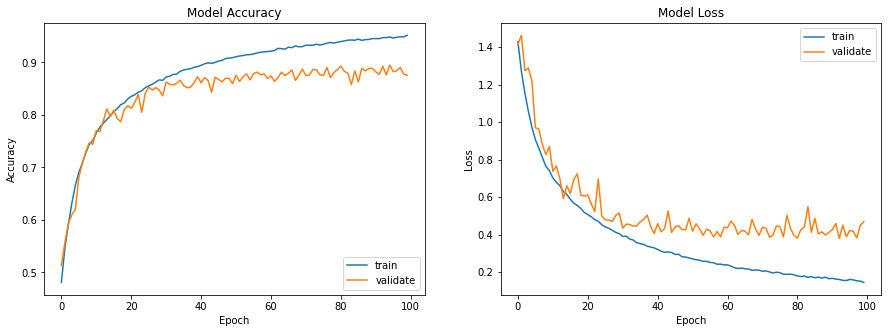

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='lower right')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

# **CONFUSION MATRIX**

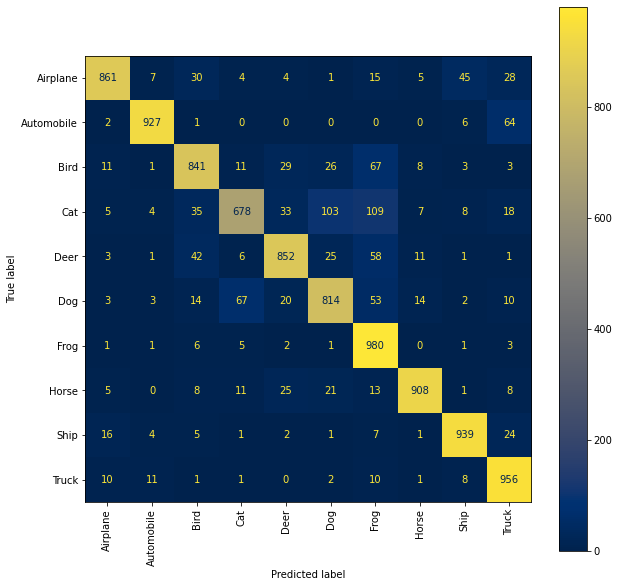

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='cividis')

plt.show()

# **REPORT**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1000
           1       0.97      0.93      0.95      1000
           2       0.86      0.84      0.85      1000
           3       0.86      0.68      0.76      1000
           4       0.88      0.85      0.87      1000
           5       0.82      0.81      0.82      1000
           6       0.75      0.98      0.85      1000
           7       0.95      0.91      0.93      1000
           8       0.93      0.94      0.93      1000
           9       0.86      0.96      0.90      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



# **PREDICTION**

In [ ]:
predictions = model.predict(X_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

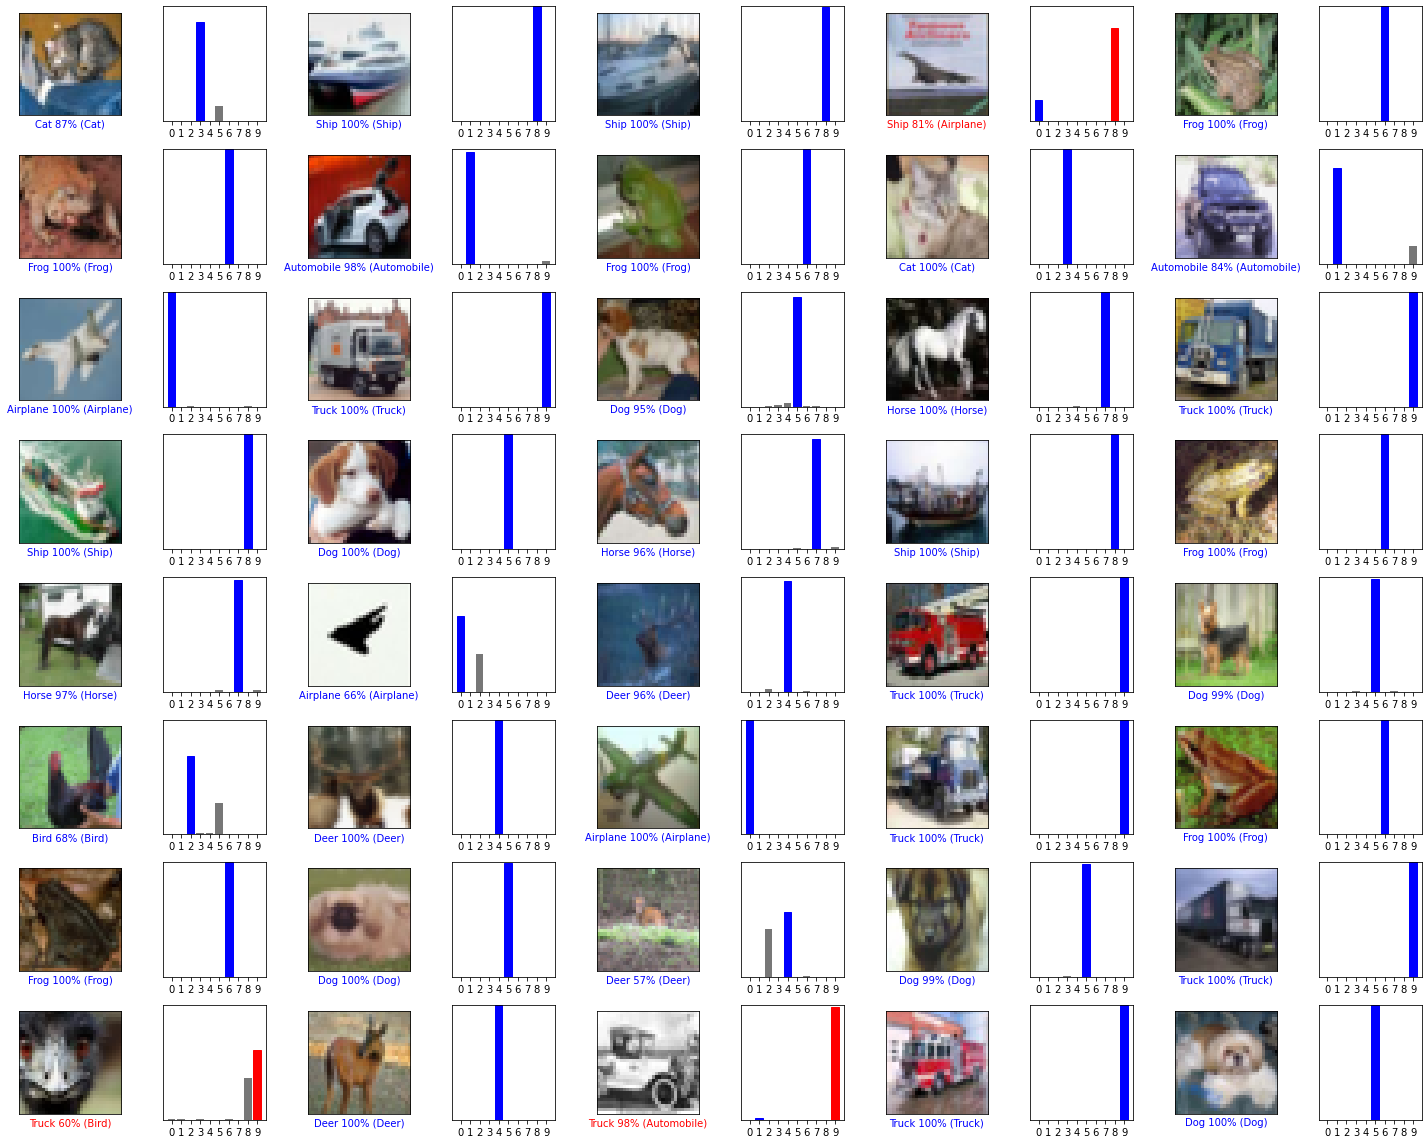

In [ ]:
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import load_model 
model.save('project_model.h5')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


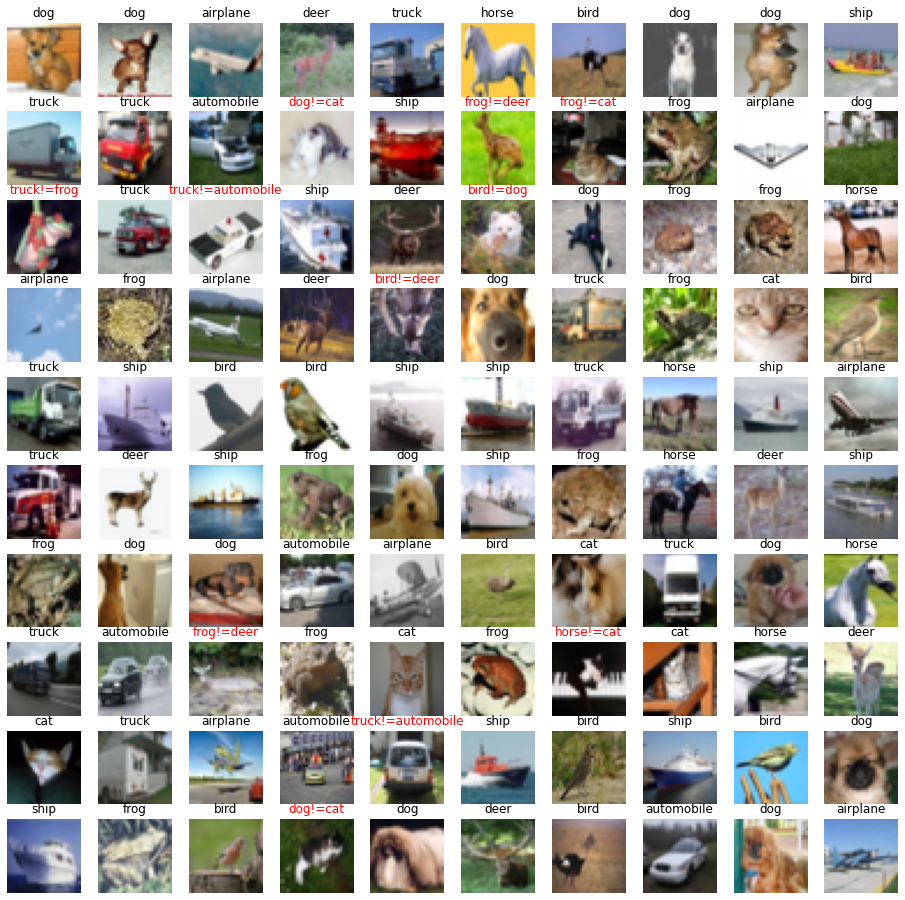

The number of correct answers: 89
The number of mistake: 11
A correct answer rate: 89.0 %


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

# cifar10 category label name
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

model = load_model('project_model.h5')
    
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

right = 0
mistake = 0

for i in range(100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')